# Used-Cars

## Programming for Data Science Course from University of Science
## Final project



### Team members
<center>

|Thành viên           |MSSV     |
|:-------------------|:-------|
|Vũ Minh Chiến        |22127045 |
|Quách Trần Quán Vinh |22127460 |

</center>

### **1. Collecting data**

What subject is your data about?
- Craigslist is the world's largest collection of used vehicles for sale, this dataset includes part of used vehicle entry within the United States on Craigslist.

What is the source of your data?
- The source of this data set can be found in [kaggle](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data/data). For this project, we have reduce the origin data set, which contains 426880 rows, down to 150000 rows (the reason for this will be mentioned in reflection part).

Do authors of this data allow you to use like this?
- Yes, this data set have `CC0: Public Domain` license (you can find more informaitons about the license [here](https://creativecommons.org/publicdomain/zero/1.0/)).

How did authors collect data?
- The arthor collect data by a web application built with Flask which scrapes used vehicle listings weekly from all regional Craigslist sites in the United States (you can find more informaitons on scraping process [here](https://github.com/AustinReese/UsedVehicleSearch)).

##### Import necessary libraries

In [72]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##### Read the dataset

In [73]:
df = pd.read_csv('vehicles.zip', delimiter=',', compression='zip')

### **2. Exploring data**

In [74]:
# display dataset
df.sample(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
55743,7313950423,https://monroemi.craigslist.org/ctd/d/dundee-2...,monroe,https://monroemi.craigslist.org,6700,2011.0,dodge,journey,excellent,6 cylinders,...,mid-size,SUV,black,https://images.craigslist.org/01515_eUvqE3fUtc...,"2011 Dodge Journey 3.5L 6 cyl 142,280 miles au...",NaN,mi,41.954350,-83.657645,2021-04-28T14:26:40-0400
64500,7316617083,https://orangecounty.craigslist.org/cto/d/miss...,orange county,https://orangecounty.craigslist.org,26800,2013.0,ford,mustang gt premium,excellent,8 cylinders,...,NaN,coupe,black,https://images.craigslist.org/00Z0Z_34mYOFc244...,"61,550 Miles (first pictures are more recent, ...",NaN,ca,33.614400,-117.643300,2021-05-04T01:24:38-0700
42504,7301907393,https://kenai.craigslist.org/cto/d/sterling-19...,kenai peninsula,https://kenai.craigslist.org,1500,1978.0,mercury,zephyr,good,8 cylinders,...,mid-size,NaN,yellow,https://images.craigslist.org/00r0r_jsGsQymQ6N...,Rare car V8 automatic posi-trac runes and driv...,NaN,ak,60.614000,-151.255000,2021-04-04T18:44:18-0800
45226,7315280360,https://lansing.craigslist.org/cto/d/south-lyo...,lansing,https://lansing.craigslist.org,12500,2009.0,ford,f150 4x4,good,8 cylinders,...,NaN,truck,blue,https://images.craigslist.org/00D0D_fo0SUG9qNG...,2009 Ford F-150 XLT SuperCrew 4x4. Mechanicall...,NaN,mi,42.456700,-83.659000,2021-05-01T10:30:35-0400
98381,7303739980,https://worcester.craigslist.org/ctd/d/manchau...,worcester / central MA,https://worcester.craigslist.org,13999,2008.0,jeep,wrangler sahara,good,6 cylinders,...,NaN,NaN,black,https://images.craigslist.org/00A0A_dik8hrzRpW...,Nice Jeep just in time for summer,NaN,ma,42.101245,-71.704538,2021-04-08T13:39:57-0400


##### How many rows and columns are there in the dataset?

In [75]:
rows, cols = df.shape
print(f'Number of rows: {rows} \nNumber of columns: {cols}')

Number of rows: 100000 
Number of columns: 26


##### What is the meaning of each row/column?

- Each row corresponds to an used car with different attributes being sale.
- Columns meaning:
  - `id`: A unique identifier for each vehicle. Used to distinguish records in the dataset.
  - `url`: A **Craigslist** web address of the vehicle.
  - `region`: The geographic area where the vehicle is listed for sale.
  - `region_url`: A **Craigslist** web address for the region's page where the vehicle is listed..
  - `price`: Price of the vehicle.
  - `year`: The manufacturing year of the vehicle.
  - `manufacturer`: The brand or company that manufactured the vehicle.
  - `model`: The specific model of the vehicle.
  - `condition`: The state of the vehicle.
  - `cylinders`: The number of cylinders in the engine.
  - `fuel`: The type of fuel the vehicle uses.
  - `odometer`: The mileage of the vehicle at the time of listing.
  - `title_status`: The legal status of the vehicle's title (e.g., clean, salvage).
  - `transmission`: The type of transmission system (e.g., automatic, manual).
  - `VIN`: Vehicle Identification Number—a unique code assigned to every vehicle.
  - `drive`: The drivetrain type (e.g., front-wheel drive (FWD), rear-wheel drive (RWD)).
  - `size`: The physical size of the vehicle.
  - `type`: The vehicle's purpose or category (e.g., SUV, sedan, truck).
  - `paint_color`: The color of the vehicle's exterior paint.
  - `image_url`: The web address of an image showcasing the vehicle in the listing.
  - `description`: A textual description of the vehicle written by the seller.
  - `county`: The county where the vehicle is listed for sale.
  - `state`: The state where the vehicle is listed for sale.
  - `lat`: The latitude coordinate of the vehicle’s location.
  - `long`: The longitude coordinate of the vehicle’s location.

##### Are there any duplicated rows?

In [76]:
if df.duplicated().sum() != 0:
    print("There are duplicate rows")
else:
    print('There aren\'t duplicate rows')

There aren't duplicate rows


##### What is the current data type of each column? Are there columns having inappropriate data types?

In [77]:
df.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

`county`: name of a place $\rightarrow$ should be object type instead of float64 type.

In [78]:
# Checking for distinct values

df['county'].unique()

array([nan])

Since all values of `county` column are missing, we remove this column from the dataset.

In [79]:
df.drop(columns='county', inplace=True)

##### With each numerical column, how are values distributed?

- Min? max? Are they abnormal?

In [80]:
numerical_features = df.select_dtypes('number').columns

min_vals = df[numerical_features].min(axis=0)
max_vals = df[numerical_features].max(axis=0)

min_max_numeric = pd.DataFrame({'min': min_vals, 'max': max_vals})
min_max_numeric

,min,max
id,7.209065e+09,7.317098e+09
price,0.000000e+00,3.009549e+09
year,1.900000e+03,2.022000e+03
odometer,0.000000e+00,1.000000e+07
lat,-4.923221e+01,7.786064e+01
long,-1.597199e+02,1.676299e+02


Min value of `price` is **0**, which is abnormal. Therefore, we can consider **0** as **missing values**. 

In [81]:
# Convert all zero values of price column to NaN

df['price'] = df['price'].replace(0, np.nan)

- What is the percentage of missing values?

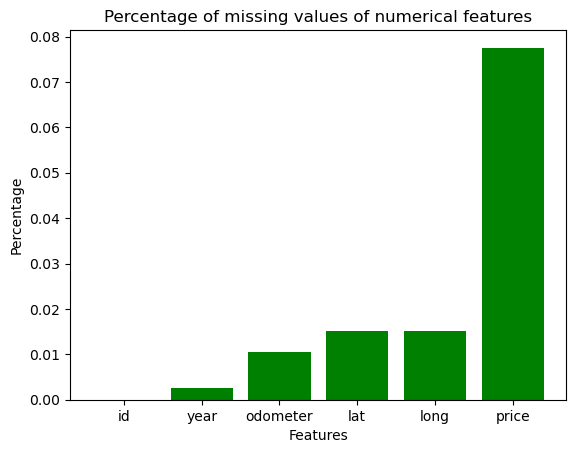

In [82]:
missing_numeric = df[numerical_features].isna().sum()/len(df)
missing_numeric = missing_numeric.sort_values()

plt.bar(missing_numeric.index, missing_numeric.values, color='green')
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.title('Percentage of missing values of numerical features');

##### With each categorical column, how are values distributed?

### **3. Asking meaningful questions**

##### **What factors most significantly impact used car prices?**
- This give us the insight of how each features affect the car pricing. The sellers can base on this to decide the price of the car which they want to sell to make the most of it.
- For buyers, this can help to determine how valuable a car is before buying it, this can help prevent buying bad cars with crazy price.

##### **What is the common trend of all sold cars (manufacturer, year, odometer,...)? What it says about the used cars in American?**
- Knowing the habbit of customers can help the sellers focus on what the customers are looking for so as to push the consumptions.
- The manufacturers can base on this to adjust their products to fit with more people.